In [1]:
# convolutional neural network 畳み込みニューラルネットワーク
# 用途：音声認識、自然言語処理、画像解析
# 膨大な特徴量を全結合するのではなく、畳み込み層、プーリング層などを使って部分的に接続された層を接続していくことで
# 計算資源の節約に貢献する
# お決まり設定
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
from io import open

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
# 畳み込み層
# 受容野：人間が物体を見るとき、視野の限られた領域の視覚的刺激だけに反応している。
# つまり画像全体の特徴量ではなく、ごく一部の特徴量を畳み込むことで特徴量として作用させることができる

# 畳み込み層は領域の指定と二つの連続する受容野の距離、補正用のパディングで成り立っている
# 畳み込み層の設定には　幅、高さ、ストライド(連続する受容野の距離。こちらも高さと幅の指定が可能)が必要
# 0パディング　高さと幅が前の層と同じになるように入力の周囲に０を追加する。

# フィルタ
# 下記の縦線、横線のイメージで見れるようなフィルタをかけることでフィルタをかけられた部分以外を強調した　特徴量マップ　を作る
# パラメータの削減及び特定位置違いのパターン認識ができることもある

# 入力層、畳み込み層とも複数の特徴量マップを持つことができるため複数のフィルタを適用したり、任意の位置にある複数の特徴を検出できる
# 例：入力層にRGBの各色の特徴量マップを持ち、畳み込み層ではそれを受け取る各特徴量マップを持つ


# フィルタ機能を確認するためのグレースケール画像とRGB画像をプロットするための2つのユーティリティ関数
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

In [3]:
import tensorflow as tf

In [4]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
image = china[150:220, 130:250]
height, width, channels = image.shape
image_grayscale = image.mean(axis=2).astype(np.float32)
images = image_grayscale.reshape(1, height, width, 1)

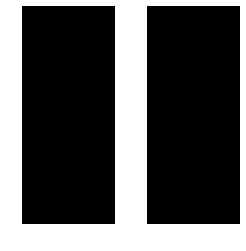

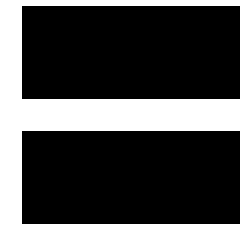

In [5]:
fmap = np.zeros(shape=(7, 7, 1, 2), dtype=np.float32)
fmap[:, 3, 0, 0] = 1
fmap[3, :, 0, 1] = 1
plot_image(fmap[:, :, 0, 0])
plt.show()
plot_image(fmap[:, :, 0, 1])
plt.show()
# 縦線、横線のフィルタイメージ。白い部分が強調され、黒い部分は無視される

In [6]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap)
convolution = tf.nn.conv2d(X, feature_maps, strides=[1,1,1,1], padding="SAME")

In [7]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict={X: images})

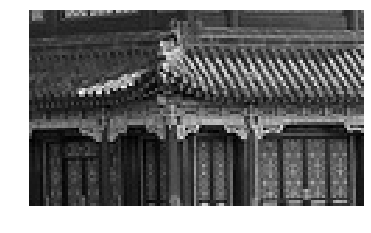

In [9]:
# オリジナル画像
plot_image(images[0, :, :, 0])
plt.savefig("china_original", tight_layout=False)
plt.show()

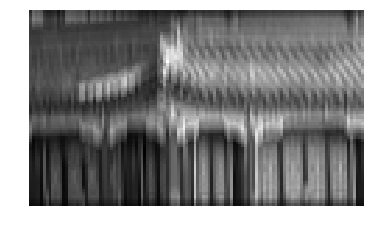

In [10]:
# 縦線のフィルタをかけた結果
plot_image(output[0, :, :, 0])
plt.savefig("china_vertical", tight_layout=False)
plt.show()
# 縦の白線部分が強調され、他がぼやける　ように見えないけどそうらしい

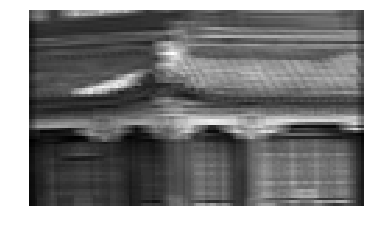

In [11]:
# 横線のフィルタをかけた結果
plot_image(output[0, :, :, 1])
plt.savefig("china_horizontal", tight_layout=False)
plt.show()
# 横の白線部分が強調され、他がぼやける　ように見えないけどね